<html> <h1 style="font-style:bold; color:blue;"> Neural Computing and Deep Learning </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-10 </h1> </html>

<html> <h2 style="font-style:italic; color:blue;"> Simple AutoEncoders with Image Data </h2> </html>

Here is a simple autoencoder with just the dense layers.


Load the data and import the libraries.

In [2]:
# Your code to import matplotlib, pandas and numpy libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#
#
#


_______________________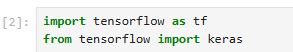

In [3]:
import tensorflow as tf
from tensorflow import keras

__________________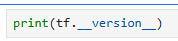

In [4]:
print(tf.__version__)

2.18.0


____________________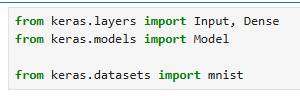

In [5]:
from keras.layers import Input, Dense 
from keras.models import Model
from keras.datasets import mnist

In [6]:
# Your code to load MNIST data and store it in variables x_train, x_test. 
# Note -  we do not need labels as it's autoencoder.
(x_train,_),(x_test,_)=mnist.load_data()
#



______________________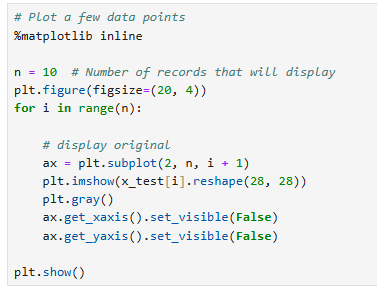

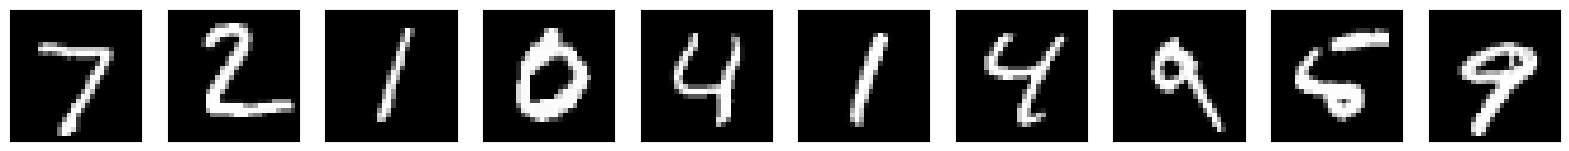

In [7]:
%matplotlib inline
n=10
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [8]:
# Your code to
# normalise train data - Divided by 255
x_train=x_train/255
x_test=x_test/255
#

# normalise test data - Divided by 255

#


<html> <h3 style="font-style:italic; color:blue;"> Basic AutoEncoder : </h3> </html>

Build a basic symmetric encoder-decoder network that recreates the image.  
This network could be used in dimensionaliry reduction or feature learning. 


________________________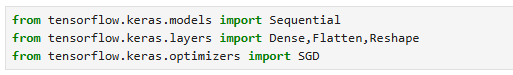

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [10]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

# Add as many layers in the Encoder network of your choice
encoder.add(Dense(225,activation='relu'))
encoder.add(Dense(170,activation='relu'))
encoder.add(Dense(150,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))
#
#
#
#

# The last TWO layers of the Encoder and Decoder must be matched (see the following decoder cell)

#
#


C:\Users\Dhana\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Your code to print your Encoder model
encoder.summary()
#


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 225)                 │         176,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 170)                 │          38,420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 150)                 │          25,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 50)                  │           7,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 25)                  │           1,275 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 249,520 (974.69 KB)

 Trainable params: 249,520 (974.69 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Your OWN Encoder model should be printed here 
# Please do not copy the model below

In [13]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))

# Add as many layers in the Decoder as you want. 
# Reember - Encoder and Decoder must be symmetric.

decoder.add(Dense(150,activation='relu'))
decoder.add(Dense(175,activation='relu'))
decoder.add(Dense(225,activation='relu'))
#
#
#


decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))


C:\Users\Dhana\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Your code to print the Decoder model
decoder.summary()
#


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 50)                  │           1,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 150)                 │           7,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 175)                 │          26,425 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 225)                 │          39,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 784)                 │         177,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 28, 28)              │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 252,159 (985.00 KB)

 Trainable params: 252,159 (985.00 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Your OWN Decoder model should be printed here 
# Please do not copy the model below

____________________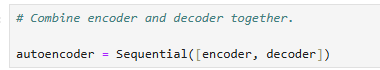

In [16]:
autoencoder= Sequential ([encoder, decoder])

In [17]:
# Your code to print the Autoencoder model
autoencoder.summary()
#

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 25)                  │         249,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 28, 28)              │         252,159 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 501,679 (1.91 MB)

 Trainable params: 501,679 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Your OWN Autoencoder model should be printed here 

In [19]:
#SGD?

In [20]:
# Your code to compile the Autoencoder. 
# Use binary_crossenropy as loss and metrics as accuracy.
autoencoder.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
#


___________________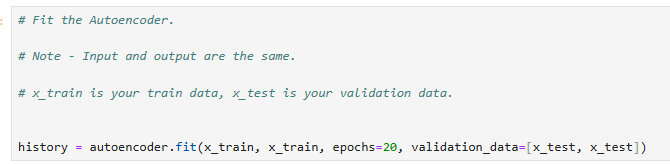

In [21]:
history =autoencoder.fit(x_train, x_train, epochs=20, validation_data=[x_test, x_test])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.1401 - loss: 0.2166 - val_accuracy: 0.2249 - val_loss: 0.1333
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2322 - loss: 0.1297 - val_accuracy: 0.2397 - val_loss: 0.1170
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2503 - loss: 0.1161 - val_accuracy: 0.2579 - val_loss: 0.1093
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.2611 - loss: 0.1095 - val_accuracy: 0.2644 - val_loss: 0.1052
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2695 - loss: 0.1053 - val_accuracy: 0.2691 - val_loss: 0.1024
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.2735 - loss: 0.1026 - val_accuracy: 0.2739 - val_loss: 0.1012
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2784 - loss: 0.1006 - val_accuracy: 0.2785 - val_loss: 0.0999
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2803 - loss: 0.0

____________________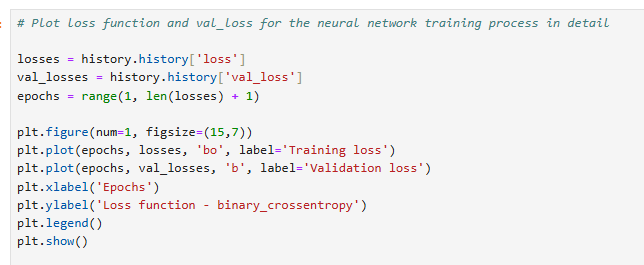

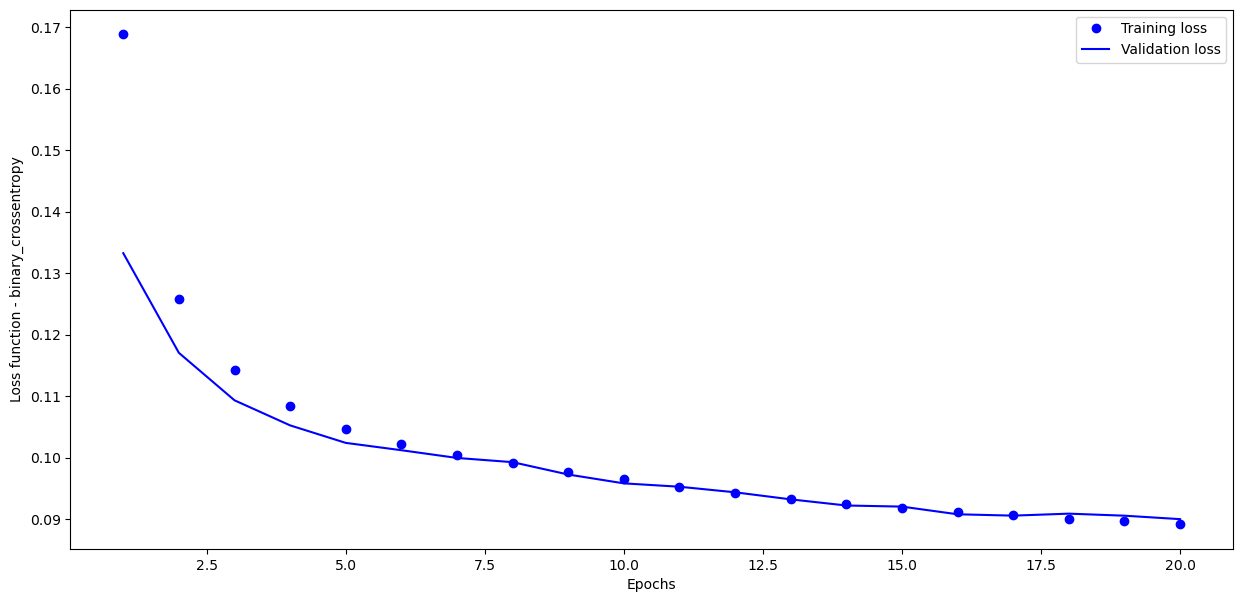

In [22]:
losses=history.history['loss']
val_losses =history.history['val_loss']
epochs= range(1, len (losses) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function - binary_crossentropy')
plt.legend()
plt.show()

___________________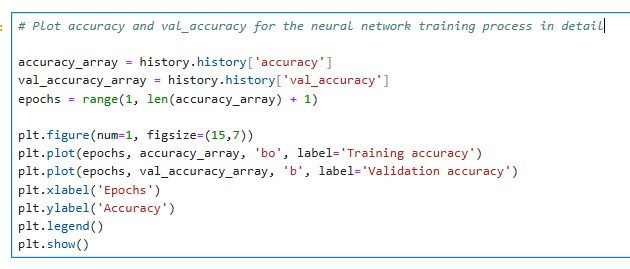

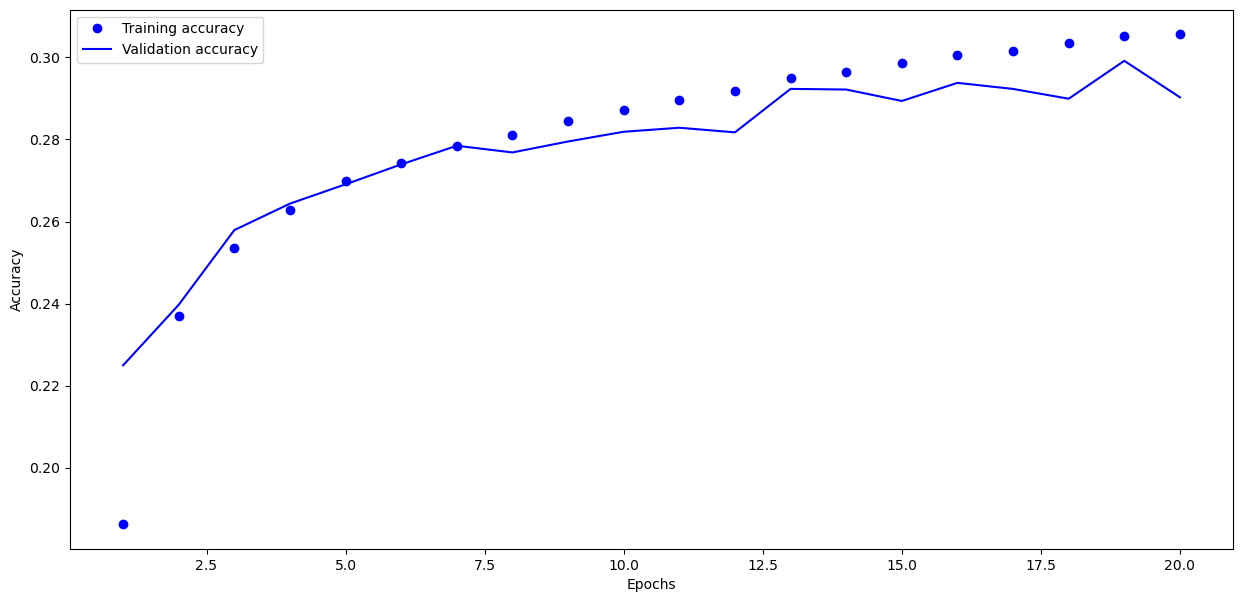

In [23]:
accuracy_array =history.history['accuracy']
val_accuracy_array =history.history['val_accuracy']
epochs= range(1, len (accuracy_array) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, accuracy_array, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_array, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

_______________________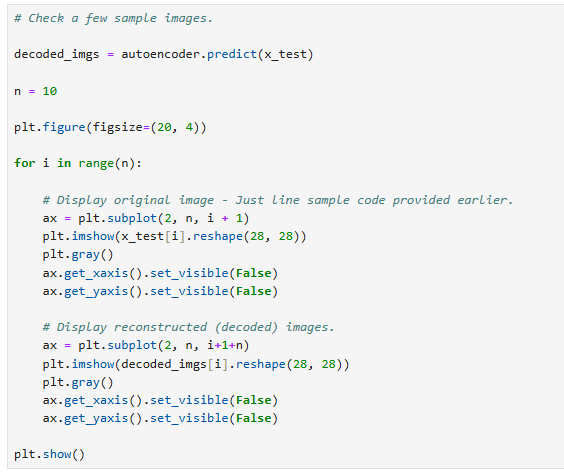

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


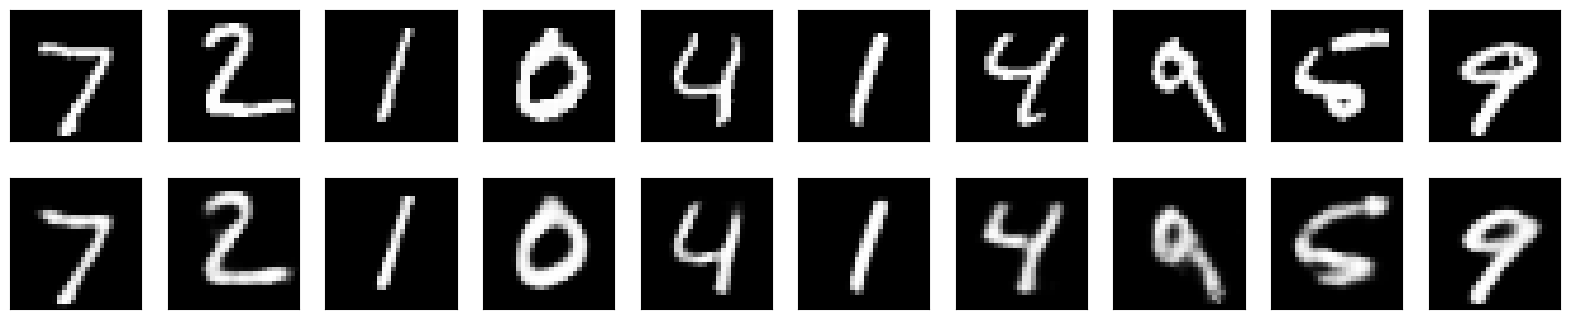

In [24]:
decoded_imgs =autoencoder.predict(x_test)
n =10
plt.figure(figsize=(20, 4))
for i in range(n):
#Display original image Just Line sample code provided earlier.
    ax= plt.subplot(2, n, i+1) 
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #Display reconstructed (decoded) images.
    ax =plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape (28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

<html> <h3 style="font-style:italic; color:blue;"> AutoEncoders for Denoising Images : </h3> </html>

Use the same digit data set. Add Gaussian noise to it to train an autoencoder that removes noise. Test the noisy samples. 


______________________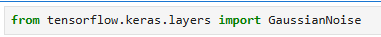

In [25]:
from tensorflow.keras.layers import GaussianNoise

In [26]:
#GaussianNoise?

___________________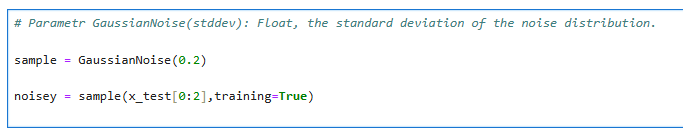

In [27]:
sample=GaussianNoise(0.2)
noisey=sample(x_test[0:2])

In [28]:
# Plot the original and noisy images

_______________________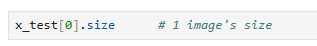

In [29]:
x_test[0].size

784

____________________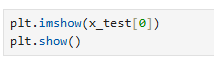

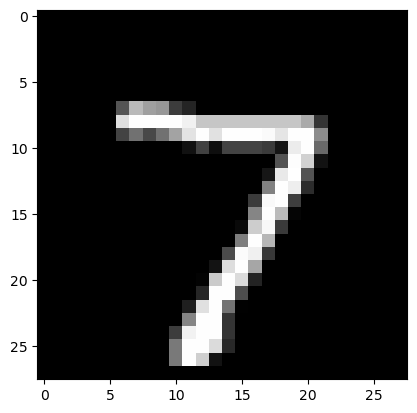

In [30]:
plt.imshow(x_test[0])
plt.show()

_____________________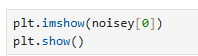

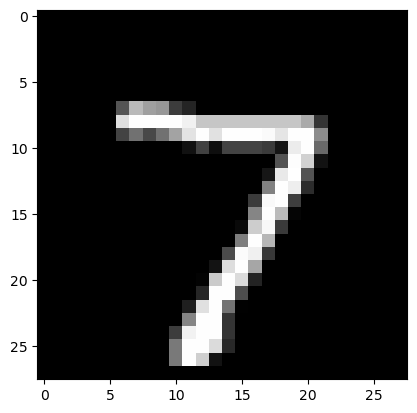

In [31]:
plt.imshow(noisey[0])
plt.show()

_________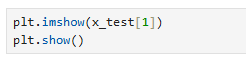

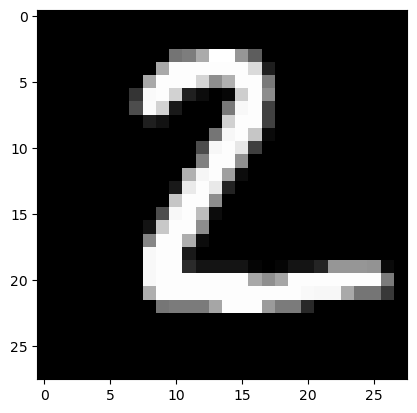

In [32]:
plt.imshow(x_test[1])
plt.show()

______________________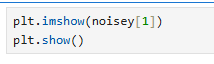

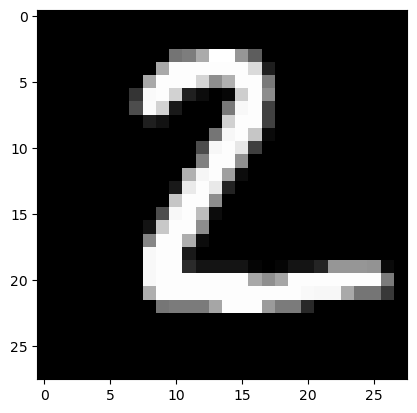

In [33]:
plt.imshow(noisey[1])
plt.show()

<html> <h4 style="font-style:italic; color:blue;"> Create a noise removal autoencoder and train it </h4> </html>

- Again similar to above it is a symmetric dense network. 
- Gaussian noise is added at the input so that the network sees noisy images and is able to map it to the clean outputs.


### Input - Images with noise
### Labels - Clean images.


In [34]:
# Encoder

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.2)) # We are adding noise to make input as noisy images

# Add layers of Encoder network. You could use the same number of layers as you created earlier
encoder.add(Dense(150,activation='relu'))
encoder.add(Dense(225,activation='relu'))
encoder.add(Dense(75,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))
#
#
#
#

print(encoder.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gaussian_noise_1 (GaussianNoise)     │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 150)                 │         117,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 225)                 │          33,975 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 75)                  │          16,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 50)                  │           3,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 25)                  │           1,275 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 173,750 (678.71 KB)

 Trainable params: 173,750 (678.71 KB)

 Non-trainable params: 0 (0.00 B)

None


In [35]:
# Your OWN Encoder model should be printed here 
# Please do not copy the model below

In [36]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))

# Add layers of the Decoder network. You could use the same number of layers as you created earlier
# Reember - Encoder and Decoder must be symmetric


decoder.add(Dense(75,activation='relu'))
decoder.add(Dense(225,activation='relu'))
decoder.add(Dense(150,activation='relu'))
#
#
#


decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

print(decoder.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 50)                  │           1,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 75)                  │           3,825 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 225)                 │          17,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 150)                 │          33,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 784)                 │         118,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 28, 28)              │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 174,509 (681.68 KB)

 Trainable params: 174,509 (681.68 KB)

 Non-trainable params: 0 (0.00 B)

None


In [37]:
# Your OWN Decoder model should be printed here 
# Please do not copy the model below

_________________________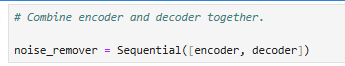

In [38]:
noise_remover=Sequential([encoder,decoder])

In [39]:
# Your code to print the Autoencoder model
noise_remover.summary()
#

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)            │ (None, 25)                  │         173,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_4 (Sequential)            │ (None, 28, 28)              │         174,509 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 348,259 (1.33 MB)

 Trainable params: 348,259 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Your OWN Autoencoder model should be printed here 

In [41]:
# Your code to compile the 'noise_remover' model with the same parameters as earlier
noise_remover.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# noise_remover.compile( ................  )


In [42]:
# Your code to fit 'noise_remover' model with the same parameters as earlier
history_2 =noise_remover.fit(x_train, x_train, epochs=42, validation_data=[x_test, x_test])
# history_2 = ..........................


Epoch 1/42
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.1225 - loss: 0.2283 - val_accuracy: 0.2150 - val_loss: 0.1402
Epoch 2/42
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.2168 - loss: 0.1386 - val_accuracy: 0.2329 - val_loss: 0.1224
Epoch 3/42
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.2348 - loss: 0.1246 - val_accuracy: 0.2451 - val_loss: 0.1145
Epoch 4/42
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.2473 - loss: 0.1181 - val_accuracy: 0.2471 - val_loss: 0.1115
Epoch 5/42
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.2526 - loss: 0.1145 - val_accuracy: 0.2592 - val_loss: 0.1073
Epoch 6/42
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.2599 - loss: 0.1111 - val_accuracy: 0.2685 - val_loss: 0.1047
Epoch 7/42
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.2625 - loss: 0.1092 - val_accuracy: 0.2699 - val_loss: 0.1029
Epoch 8/42
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2670 - loss: 0.

In [43]:
# Hint: Use (copy and modify) the code from the cells above

___________________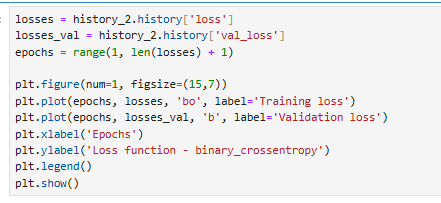

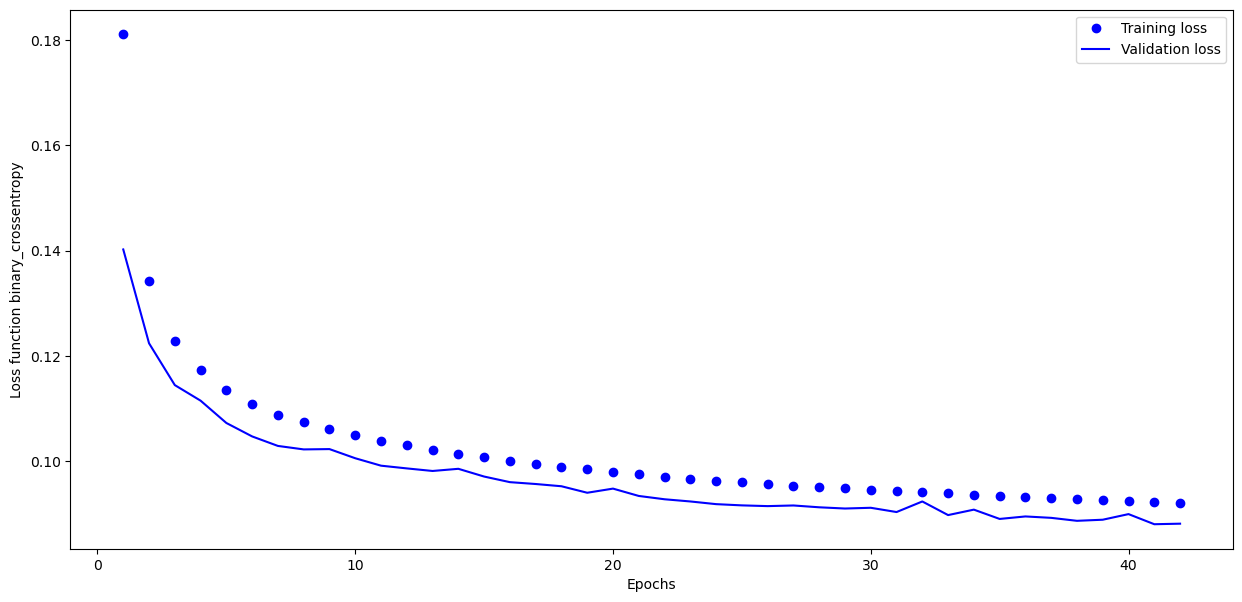

In [44]:
losses =history_2.history['loss']
losses_val= history_2.history['val_loss']
epochs= range(1, len(losses) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, losses, 'bo', label='Training loss')
plt.plot(epochs, losses_val, 'b', label= 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function binary_crossentropy')
plt.legend()
plt.show()

___________________________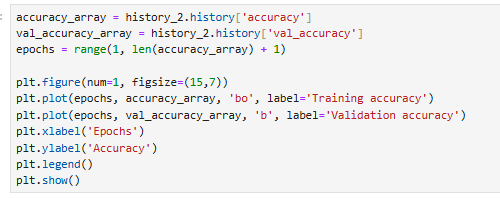

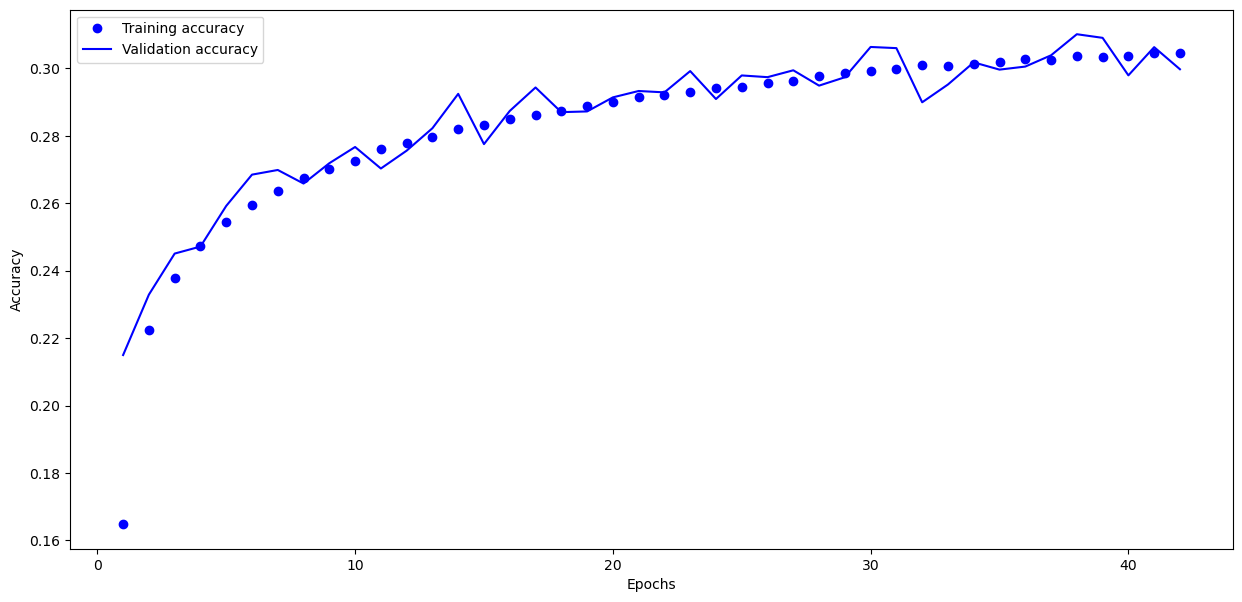

In [45]:
accuracy_array= history_2.history['accuracy']
val_accuracy_array= history_2.history['val_accuracy']
epochs =range(1, len(accuracy_array)+ 1)
plt.figure(num=1, figsize= (15,7))
plt.plot(epochs, accuracy_array, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_array, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

______________________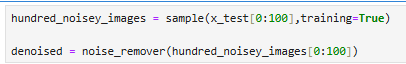

In [46]:
hundred_noisey_images =sample(x_test[0:100], training=True)
denoised =noise_remover(hundred_noisey_images[0:100])

______________________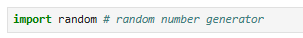

In [47]:
import random

_______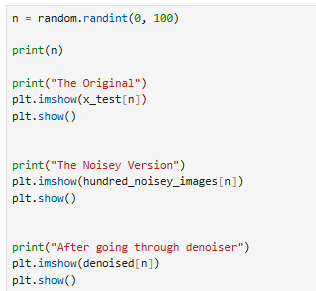

90
The Original


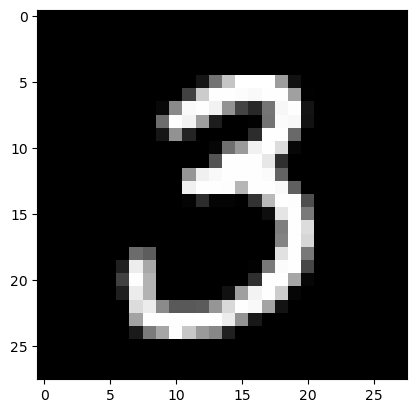

The Noisey Version


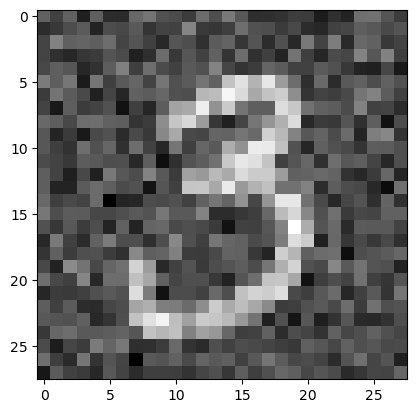

After going through denoiser


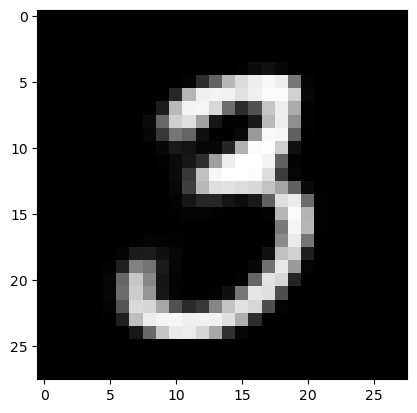

In [48]:
n= random.randint(0, 100)
print(n)
print("The Original")
plt.imshow(x_test[n])
plt.show()
print("The Noisey Version")
plt.imshow(hundred_noisey_images[n])
plt.show()
print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()

<html> <h2 style="font-style:bold; color:red;"> Lab Logbook requirements </h2> </html>

 - Put the Encoder, Decoder and Basic Autoencoder models using summary() in your lab logbook.

Ensure that no code or other information is added to the logbook and that only required information is present. Marks will not be awarded if anything else is found in the logbook or instructions are not clearly followed.

NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.